## Linear Regression with WHO dataset

In this note, I review the concept of the linear regression and demonstrate it with the WHO dataset.

### Review: Linear regression

Linear regression is a method to establish the relationship between the dependent variable $Y$ and independent variables $X_{1},\cdots,X_{p}$ with a linear model. That is, for the $i$th data $(x_{i1},\cdots,x_{ip})$ and $y_i$ are related by
$$\begin{eqnarray}
y_i = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \epsilon_i,
\end{eqnarray}$$
where $\beta_0,\cdots,\beta_p$ are regression coefficients and $\epsilon_i$ is the noise for the $i$th data. When the datset is composed of $n$ data points, this relation can be written in the vector notation,
$$\begin{eqnarray}
\mathbf{y} = X\mathbf{\beta}+\mathbf{\epsilon},
\end{eqnarray}$$
where $\mathbf{y} = \left(\begin{array}{c} y_1 \\ \vdots \\ y_n \end{array}\right)$,
$X=\left(\begin{array}{cccc}
1 & x_{11} & \cdots & x_{1p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \cdots & x_{np}
\end{array}\right)$,
$\mathbf{\beta}=\left(\begin{array}{c} \beta_0 \\ \vdots \\ \beta_p
\end{array}\right)$, and
$\mathbf{\epsilon}=\left(\begin{array}{c} \epsilon_1 \\ \vdots \\ \epsilon_n
\end{array}\right)$. Here, the matrix $X$ given by the data of independnet variables is often called the design matrix.

The goal of linear regression is finding regression coefficients $\mathbf{\beta}$ which best fit the data $\lbrace x_{ij} \rbrace$ with $\lbrace y_i \rbrace$ for given $n$ data points. While there are several ways to fit this model, the most common way is the least squares approach. This approach seeks to find $\beta$ that minimizes the sum of squares of errors, $\sum_{i=1}^n \epsilon_i^2 = \mathbf{\epsilon}^T \mathbf{\epsilon}$. Since this expression is a polynomial of regression coefficients, so the $\beta$ that minimizes $\mathbf{\epsilon}^T \mathbf{\epsilon}$ should satisfy

$$\begin{eqnarray}
\frac{\partial}{\partial \beta_j} \left( \mathbf{\epsilon}^T \mathbf{\epsilon} \right) & = &
\frac{\partial}{\partial \beta_j} \left(
\mathbf{y}^T \mathbf{y} - \mathbf{y}^T X \mathbf{\beta}
-\mathbf{\beta}^T X^T \mathbf{y} +\mathbf{\beta}^T X^T X \mathbf{\beta}
\right) \\
&=&
-\left((\mathbf{y}^T X)^T\right)_j
-\left( X^T \mathbf{y} \right)_j
+\left( X^T X \mathbf{\beta} \right)_j
+\left( (\mathbf{\beta}^T X^T X)^T \right)_j \\
&=& 2 \left( X^T X \mathbf{\beta} - X^T \mathbf{y} \right)_j \\ &=& 0
\end{eqnarray}$$
for every $j=0,\cdots,p$. These conditions can be turned into a matrix equation and one can be find the closed form of $\mathbf{\beta}$ from this:

$$\begin{eqnarray}
X^T X \mathbf{\beta} = X^T \mathbf{y} \quad \leftrightarrow \quad
\mathbf{\beta} = \left( X^T X \right)^{-1} X^T \mathbf{y}.
\end{eqnarray}$$

### Demonstration with WHO dataset
Now I demonstrate the linear regression with the WHO dataset I formulated in the other note. First, I load relevant libraries:

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sf
import matplotlib.pyplot as plt
import seaborn as sns

Loading the WHO dataset. For simpler analysis, we only use three variables: life expectancy, adult mortality, and health expenditure. I present the sample dataset below.

In [2]:
df=pd.read_csv("dataset_WHO.csv")

df=df[
    (~pd.isna(df["life_expectancy"]))&
    (~pd.isna(df["adult_mortality"]))&
    (~pd.isna(df["health_expenditure"]))
][["life_expectancy","adult_mortality","health_expenditure"]]

df.head()

,life_expectancy,adult_mortality,health_expenditure
0,63.20990,245.22490,8.18227
1,63.06044,237.96940,3.30698
2,78.00018,96.40514,5.88311
3,76.07952,73.95345,3.64399
4,76.57514,111.42880,4.78592


For exploratory data analysis, I present the mean, the standard deviation, the minimum/maximum, and quartiles.

In [3]:
df.describe()

,life_expectancy,adult_mortality,health_expenditure
count,181.000000,181.000000,181.000000
mean,72.628863,162.664752,6.705698
std,7.068417,86.903047,2.630527
min,50.748810,49.201850,1.475300
25%,66.631470,95.825130,4.884310
50%,73.897860,147.168600,6.379290
75%,77.762850,219.298600,8.428770
max,84.261380,483.490600,17.140750


For further exploration of dataset, I present histograms of three variables. One can see that the life expectancy data is multimodal, the adult mortality data is right-skewed, and the health expenditure data is bell-shaped.

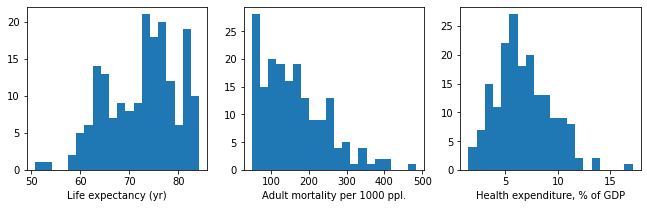

In [4]:
fig = plt.figure(figsize=[11,3])
plt.subplot(1,3,1)
plt.hist(df.life_expectancy,20)
plt.xlabel("Life expectancy (yr)")
plt.subplot(1,3,2)
plt.hist(df.adult_mortality,20)
plt.xlabel("Adult mortality per 1000 ppl.")
plt.subplot(1,3,3)
plt.hist(df.health_expenditure,20)
plt.xlabel("Health expenditure, % of GDP");

### Linear regression with single feature
To investigate how the life expectancy is correlated with either the adult mortality or the health expenditure, I present the scatter plots. While the negative correlation between the life expectancy and the adult mortality seems strong, the correlation between the life expectancy and health expenditure is seemingly unclear.

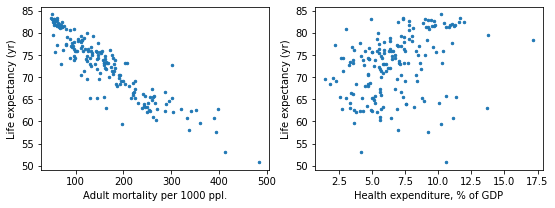

In [5]:
fig = plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
plt.scatter(df.adult_mortality,df.life_expectancy,s=6)
plt.xlabel("Adult mortality per 1000 ppl.")
plt.ylabel("Life expectancy (yr)")
plt.subplot(1,2,2)
plt.scatter(df.health_expenditure,df.life_expectancy,s=6)
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Life expectancy (yr)");

With statsmodel library, I fit the linear model between the life expectancy and adult mortality. That is, in the model $\mathbf{y} = \beta_0 + \beta_1 \mathbf{x_1} +\mathbf{\epsilon}$, $\mathbf{y}$ represents the life expectancy and $\mathbf{x_1}$ represents the adult mortality.

In [6]:
print(sf.ols("life_expectancy ~ adult_mortality",df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     856.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           3.75e-70
Time:                        15:22:27   Log-Likelihood:                -451.41
No. Observations:                 181   AIC:                             906.8
Df Residuals:                     179   BIC:                             913.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          84.6623      0.466    1

This result tells that the intercept ($\beta_0$) is 84.6623 while the coefficient for the adult mortality ($\beta_1$) is -0.0740. Since the standard error for the estimation of $\beta_1$ is 0.003 and the t-statistic is -29.273, so the negative correlation between the life expectancy and the adult mortality is quite solid.

Now I repeat the same model fitting for the case where the independent variable is the health expenditure:

In [7]:
print(sf.ols("life_expectancy ~ health_expenditure",df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     21.12
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           8.12e-06
Time:                        15:22:27   Log-Likelihood:                -600.20
No. Observations:                 181   AIC:                             1204.
Df Residuals:                     179   BIC:                             1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             66.7751      1

This result tells that the intercept ($\beta_0$) is 66.7751 while the coefficient for the adult mortality ($\beta_1$) is 0.8730, therfore the life expectancy and the health expenditure has a postivie correlation. While $\beta_1$ for the health expenditure is larger than the $\beta_1$ for the adult mortality, it does not mean that the health expenditure has stronger correlation since the scale of data for these two kinds are different. Indeed, the t-statistic for the health expenditure is 4.596 and its absolute value is smaller than that of the t-statistic for the adult mortality (-29.273).

To visualize this regression result, I plot the regressed models within the data through the seaborn library. Here the red line indicates the line $\mathbf{y}=\beta_0 + \beta_1 \mathbf{x_1}$ while the light red shadow indicates the range of this regression line considering the standard deviations for the estimation of $\beta_0$ and $\beta_1$.

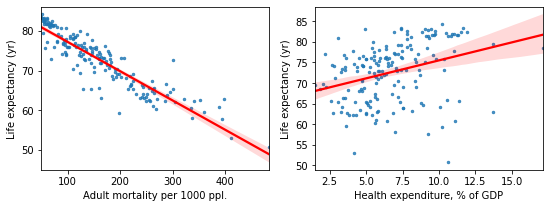

In [8]:
fig = plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
sns.regplot(x="adult_mortality",y="life_expectancy",data=df,scatter_kws={"s":6},line_kws={"color":"r"})
plt.xlabel("Adult mortality per 1000 ppl.")
plt.ylabel("Life expectancy (yr)")
plt.subplot(1,2,2)
sns.regplot(x="health_expenditure",y="life_expectancy",data=df,scatter_kws={"s":6},line_kws={"color":"r"})
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Life expectancy (yr)");

### Linear regression with multiple features

Now I fit the data with linear model contains both of the adult mortality and the health expenditure. That is, in the model $\mathbf{y}=\beta_0 + \beta_1\mathbf{x_1} + \beta_2\mathbf{x_2}+\mathbf{\epsilon}$, $\mathbf{x_1}$ represents the adult mortality while $\mathbf{x_2}$ represents the health expenditure.

In [9]:
print(sf.ols("life_expectancy ~ adult_mortality + health_expenditure",df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     450.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.39e-70
Time:                        15:22:27   Log-Likelihood:                -447.28
No. Observations:                 181   AIC:                             900.6
Df Residuals:                     178   BIC:                             910.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             82.7051      0

The result tells that the intercept ($\beta_0$) is 82.7051, the coefficient for the adult mortality ($\beta_1$) is -0.0720, and the coefficient for the health expenditure ($\beta_2$) is 0.2445. One can notice that the coefficients for each independent variables are different from the coefficients obtained in the linear regression with single feature. This is because the adult mortality and the health expenditure are not indepedent varibale to each other. To see this, we fit the data to the linear model between the the addult mortality and the health expenditure:

In [10]:
print(sf.ols("adult_mortality ~ health_expenditure",df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        adult_mortality   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     13.43
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           0.000327
Time:                        15:22:27   Log-Likelihood:                -1057.9
No. Observations:                 181   AIC:                             2120.
Df Residuals:                     179   BIC:                             2126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            221.1820     17

As seen in the result, t-statistic for the coefficient for the health expenditure ($\beta_1$) is -3.664 and therefore the two variabels we investigate are negatively correlated. One can see this correlation in the regression lines within the scatter plot:

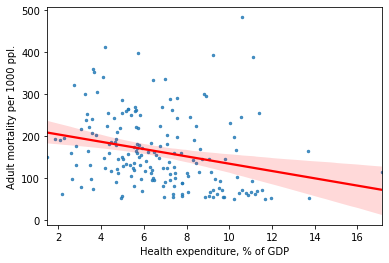

In [11]:
sns.regplot(x="health_expenditure",y="adult_mortality",data=df,scatter_kws={"s":6},line_kws={"color":"r"});
plt.xlabel("Health expenditure, % of GDP")
plt.ylabel("Adult mortality per 1000 ppl.");

### Remarks
In this note, I reviewed the concept of linear regression and demonstrated with the WHO dataset. While the regression result captures if the overall correlation is positive or negative, there are still a lot of data located far off from the regression curve. This implies that one need to include more features or to employ more complicated models to predict the life expectancy better.